In [868]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [869]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [870]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


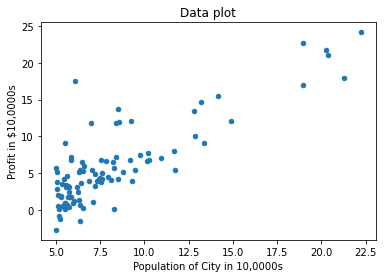

In [871]:
data.plot(x = "Population", y = "Profit", kind = 'scatter')
plt.xlabel("Population of City in 10,0000s")
plt.ylabel("Profit in $10,0000s")
plt.title("Data plot")
plt.show()

In [872]:
data.insert(0, 'Ones', 1)
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [873]:
# independent variables X
X = [data['Ones'], data['Population']]
# dependent variable y
y = data['Profit']

In [874]:
X = np.matrix(X)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]),dtype=float)

In [875]:
def computeCost(X, y, theta):
    m = y.shape[1]
    suma = np.sum(np.power(theta*X - y, 2))
    return suma/(2*m)

print(computeCost(X,y,theta))

32.072733877455676


Otrzymane wartości thety: [[-3.13719865  1.11543748]]
Ostateczny koszt: 4.529457259097518


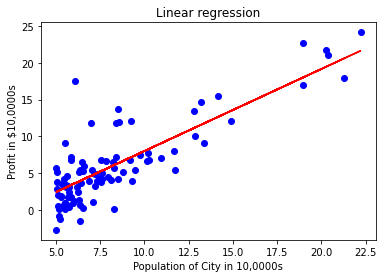

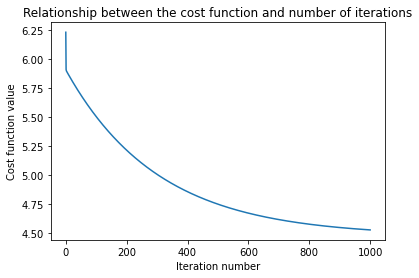

In [876]:
def simple_gradient(X, y, theta, alpha, it):
    # it - liczba iteracji
    costs = []
    for i in range(it):
        theta[0, 0] = theta[0, 0] - (alpha/X.shape[1]) * np.sum(theta*X - y)
        theta[0, 1] = theta[0, 1] - (alpha/X.shape[1]) * np.sum((theta*X - y) * X.T)
        cost = computeCost(X,y,theta)
        costs.append(cost)
    return theta, cost, costs

alpha = 0.01
it = 1000

theta, cost, costs = simple_gradient(X, y, theta, alpha, it)
print("Otrzymane wartości thety: {}".format(theta))
print("Ostateczny koszt: {}".format(cost))

plt.figure()
plt.plot('Population', 'Profit', 'bo', data=data)
plt.plot(data['Population'], theta[0, 0] + theta[0, 1]*data['Population'], '-r')
plt.xlabel("Population of City in 10,0000s")
plt.ylabel("Profit in $10,0000s")
plt.title('Linear regression')
plt.show()

iterations = np.linspace(0,1000,1000)
plt.figure()
plt.plot(iterations,costs)
plt.title('Relationship between the cost function and number of iterations')
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.show()


In [877]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [878]:
data2_norm = (data2-data2.mean())/(data2.std())
data2_norm

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [879]:
data2_norm.insert(0, 'Ones', 1)

# independent variables X
X = [data2_norm['Ones'], data2_norm['Size'], data2_norm["Bedrooms"]]
# dependent variable y
y = data2['Price']

X = np.matrix(X)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]),dtype=float)

In [880]:
print(computeCost(X,y,theta))

65591548106.45744


Otrzymane wartości thety: [[340397.96353532 104009.04035572      0.        ]]
Ostateczny koszt: 2062244187.5494637


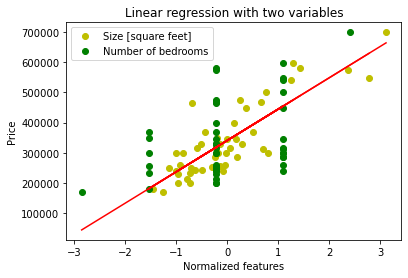

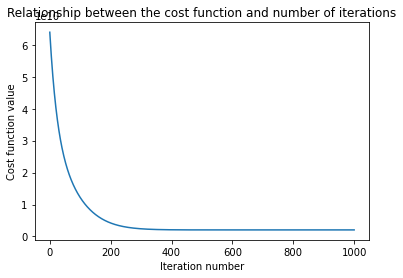

In [881]:
theta, cost, costs = simple_gradient(X, y, theta, alpha, it)
print("Otrzymane wartości thety: {}".format(theta))
print("Ostateczny koszt: {}".format(cost))

plt.figure()
plt.title('Linear regression with two variables')
plt.plot(data2_norm['Size'], data2['Price'], 'yo', label = "Size [square feet]")
plt.plot(data2_norm['Bedrooms'], data2['Price'], 'go', label = "Number of bedrooms")
plt.plot(np.matrix([data2_norm['Size'], data2_norm['Bedrooms']]), theta[0, 0] + theta[0, 1]*np.matrix([data2_norm['Size'], data2_norm['Bedrooms']]) , '-r')
plt.ylabel("Price")
plt.xlabel("Normalized features")
plt.legend()
plt.show()

iteration = np.linspace(0,1000,1000)
plt.figure()
plt.plot(iteration,costs)
plt.title('Relationship between the cost function and number of iterations')
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")
plt.show()

In [882]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html

# Data import
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

# Normalization
boston_norm = (boston_X-boston_X.mean())/(boston_X.std())

# Normalization 2
boston_norm_2 = (boston_Y-boston_Y.mean())/(boston_Y.std())

# Split into train and test sets (70-30%)
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_Y, test_size=0.3, random_state=42)

# Creating an object 
regr = linm.LinearRegression()

# Learning model on training data
regr.fit(X_train, y_train)



.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

LinearRegression()

In [883]:
y_train_predict = regr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set:")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

# Predicting values using test data
y_test_predict = regr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for test set:")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)

#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

The model performance for training set:
RMSE = 4.748208239685937
R2 = 0.7434997532004697


The model performance for test set:
RMSE = 4.638689926172797
R2 = 0.711226005748496


Coefficients: 
 [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
Residual sum of squares: 21.517444231176995


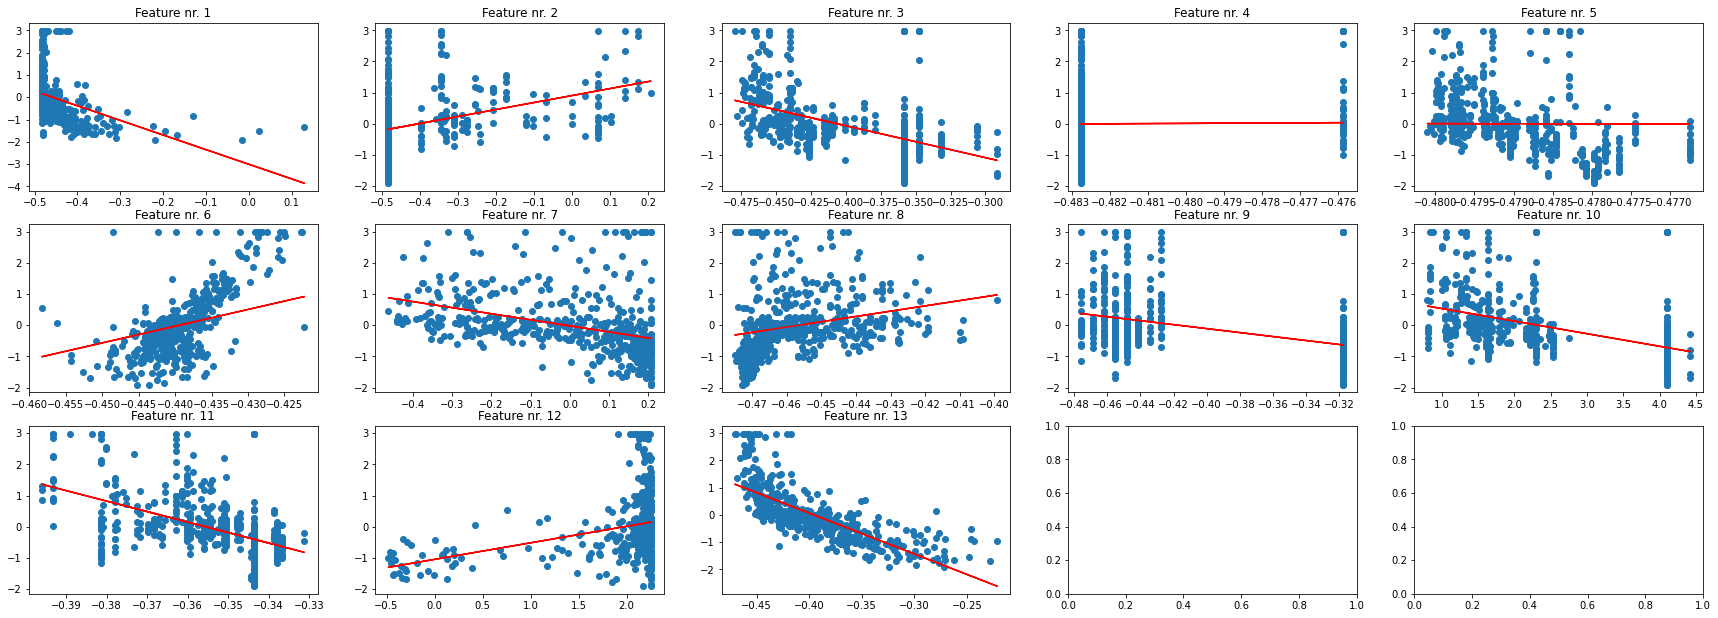

In [884]:
fig, axs = plt.subplots(ncols=5, nrows=3)
fig.set_size_inches(30, 10.5)
num = 0
alpha = 1
it = 20000
for j in range(3):
    for i in range(5):
        if num < 13:
            temp = np.vstack((np.ones(boston_norm[:,num].shape[0]),boston_norm[:,num]))
            X = np.matrix(temp)
            y = np.matrix(boston_norm_2)
            theta = np.matrix(np.array([0,0]),dtype=float)
            theta, cost, costs = simple_gradient(X, y, theta, alpha, it)
            axs[j,i].scatter(boston_norm[:,num],boston_norm_2)
            axs[j,i].plot(boston_norm[:,num], theta[0, 0] + theta[0, 1]*boston_norm[:,num], '-r')
            axs[j,i].set_title("Feature nr. {}".format(num+1))
            num += 1
plt.show()

In [887]:
reg_LinReg =linm.LinearRegression()
reg_Ridge = linm.Ridge(alpha = .5)
reg_Lasso = linm.Lasso(alpha = 5.1)
reg_ElNet =linm.ElasticNet(alpha = .5, l1_ratio=0.5)

# LinearRegression
reg_LinReg.fit(X_train, y_train)
y_test_predict = reg_LinReg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Linear Regression performance for test set:")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

# Ridge
reg_Ridge.fit(X_train, y_train)
y_test_predict = reg_Ridge.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Ridge performance for test set:")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

# Lasso
reg_Lasso.fit(X_train, y_train)
y_test_predict = reg_Lasso.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Lasso performance for test set:")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

# ElasticNet
reg_ElNet.fit(X_train, y_train)
y_test_predict = reg_ElNet.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("ElasticNet performance for test set:")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

Linear Regression performance for test set:
RMSE = 4.638689926172797
R2 = 0.711226005748496


Ridge performance for test set:
RMSE = 4.671905649943393
R2 = 0.707075618914623


Lasso performance for test set:
RMSE = 5.940958277438669
R2 = 0.5263250709786963


ElasticNet performance for test set:
RMSE = 4.897534613360654
R2 = 0.678098928701476


